<center> <H1> ✨ Projet NLP - TP4 avancé ✨ </H1></center>

___

<table style="width:100%; text-align:center;">
  <tr>
    <td>
      <strong style="font-size: 25px;">Davyd Bayard</strong><br>
      <a href="https://www.linkedin.com/in/davyd-bayard/">
        <img src="https://media.licdn.com/dms/image/D4E03AQGVOp1OztlUwA/profile-displayphoto-shrink_800_800/0/1677345039076?e=1712188800&v=beta&t=3yNosHZvNaGZTl1s4CdW_UH5N2dC7VaRkrwBOUPf7nk" alt="Davyd Bayard" width="200"/>
      </a>
    </td>
    <td>
      <strong style="font-size: 25px;">Guillaume Poirier</strong><br>
      <a href="https://www.linkedin.com/in/guillaume-poirier-41231713a/">
        <img src="https://media.licdn.com/dms/image/D4E03AQEyJMrFoKxchQ/profile-displayphoto-shrink_400_400/0/1664483713894?e=1708560000&v=beta&t=LFr2tMSek1mHi4kG6hRBWpHg3pUJuj_PpXjIA6Ks1Kw" alt="Guillaume Poirier" width="200"/>
      </a>
    </td>
  </tr>
</table>

___

<img src="https://t3.ftcdn.net/jpg/03/82/84/40/360_F_382844018_Ew4N9inbTNCylxO90v87oNHQKMzNrhsv.jpg" style="width: 100%; height: auto; display: block;"/>

___

## <span style="display:block;text-align:center;padding:15px;background-color:#00369c;color:#ffffff;border-radius:10px;font-size:150%;">Sommaire</span>

1. [Partie 1 - Classification de documents](#partr1)

  1. [Question 1](#1)

1. [Récupération du flux RSS](#1)

2. [Question 2](#q2)

3. [Question 3](#q3)

4. [Question 4](#q4)

5. [Question 5](#q5)

7. [Question 7](#q7)

8. [Question 8](#q8)

9. [Question 9](#q9)

10. [Question 10](#q10)

11. [Question 11](#q11)

12. [Question 12](#q12)

13. [Question 13](#q13)

14. [Question 14](#q14)

15. [Question 15](#q15)

16. [Question 16](#q16)

## <a class="anchor" id="part1"></a><b><span style='color:#8bb7cf'>1 |</span><span style='color:#00369c'> Partie 1 - Classification de documents</span></b>  

### <a class="anchor" id="1"></a><b><span style='color:#8bb7cf'>a |</span><span style='color:#0A1478'> Question 1</span></b>  

In [ ]:
import numpy as np
import json
import spacy
import tensorflow as tf
import matplotlib.pyplot as plt
# si besoin
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-trn.json
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-tst.json
# si besoin -- la première fois ou en cas de réinitialisation du notebook
!python -m spacy download en_core_web_md

--2024-02-14 09:29:51--  http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-trn.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33542525 (32M) [application/json]
Saving to: ‘imdb-trn.json’

imdb-trn.json       100%[===================>]  31.99M  8.62MB/s    in 3.7s    

2024-02-14 09:29:55 (8.62 MB/s) - ‘imdb-trn.json’ saved [33542525/33542525]

--2024-02-14 09:29:55--  http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-tst.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32759169 (31M) [application/json]
Saving to: ‘imdb-tst.json’

imdb-tst.json       100%[===================>]  31.24M  10.8MB/s    in 2.9s    

2024-02-14 09:29:58 (10.8 MB/s) - ‘im

In [ ]:
import pandas as pd
df_train = pd.read_json("imdb-trn.json")
df_train.head()

,0,1
0,pos,For a movie that gets no respect there sure ar...
1,pos,Bizarre horror movie filled with famous faces ...
2,pos,"A solid, if unremarkable film. Matthau, as Ein..."
3,pos,It's a strange feeling to sit alone in a theat...
4,pos,"You probably all already know this by now, but..."


In [ ]:
df_train.shape

(25000, 2)

In [ ]:
df_train[0].value_counts(dropna=False)

pos    12500
neg    12500
Name: 0, dtype: int64

Data set parfaitement equilibré donc pas de rééquilibrage à faire.

In [ ]:
df_test = pd.read_json("imdb-tst.json")
df_test.head()

,0,1
0,pos,"Based on an actual story, John Boorman shows t..."
1,pos,This is a gem. As a Film Four production - the...
2,pos,"I really like this show. It has drama, romance..."
3,pos,This is the best 3-D experience Disney has at ...
4,pos,"Of the Korean movies I've seen, only three had..."


In [ ]:
df_test.shape

(25000, 2)

In [ ]:
df_test[0].value_counts(dropna=False)

pos    12500
neg    12500
Name: 0, dtype: int64

Je suis étonné de voir un data set de train aussi long qu'un data set

In [ ]:
process = spacy.load('en_core_web_md')

In [ ]:
# Transformation des données en liste et decomposition en pipeline.
# Dans notre cas d'usage, on utilise que la tokenisation et l'étiquetage morpho-
# syntaxique. Donc on peut désactiver les autres composants. Comme pour le TP2,
# on désactive le parser, le Named Entity Recognition (NER). On pourrait
# eventuellement desactiver d'autres composants dont vous n'avez pas besoin pour votre tâche spécifique.

train_text = df_train[1].to_list()#[x[1] for x in df_train]
train_label = df_train[0].to_list()#[x["0"] for x in df_train]
train_doc = []

for doc in process.pipe(train_text, disable=["parser", "ner"]):
  train_doc.append(doc)

print(len(train_doc))

test_text = df_test[1].to_list()#[x["1"] for x in df_test]
test_label = df_test[0].to_list()#[x["0"] for x in df_test]
test_doc = []

for doc in process.pipe(test_text, disable=["parser", "ner"]):
  test_doc.append(doc)

print(len(test_doc))

25000
25000


A l'avenir, pour faire tourner le code, il vaut mieux le tester sur un echantillon car le temps d'execution est important.

Regroupement dans une colonne "doc" du processing.

In [ ]:
df_train['doc'] = train_doc
df_test['doc'] = test_doc

In [ ]:
df_train.head()

,0,1,doc
0,pos,For a movie that gets no respect there sure ar...,"(For, a, movie, that, gets, no, respect, there..."
1,pos,Bizarre horror movie filled with famous faces ...,"(Bizarre, horror, movie, filled, with, famous,..."
2,pos,"A solid, if unremarkable film. Matthau, as Ein...","(A, solid, ,, if, unremarkable, film, ., Matth..."
3,pos,It's a strange feeling to sit alone in a theat...,"(It, 's, a, strange, feeling, to, sit, alone, ..."
4,pos,"You probably all already know this by now, but...","(You, probably, all, already, know, this, by, ..."


In [ ]:
print(train_doc[0])

For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.


Pas besoin de ça
```python
def annot(doc) :
  annotations = []
  for token in doc:
      annotations.append({
          'pos': token.pos_,
          'lemma': token.lemma_,
      })

  return annotations

# Créer un DataFrame à partir des annotations
df_train['annotations'] = df_train.apply(lambda x: annot(x['doc']),axis=1)

# Créer un DataFrame à partir des annotations
df_test['annotations'] = df_test.apply(lambda x: annot(x['doc']),axis=1)

```

# Fonctions pour représenter un document comme un vecteur moyen de plongement
## Préparation des données

- **version filtrée** : moyenne des plongements des tokens dont l'étiquette morphosyntaxique est dans une liste donnée (typiquement ('VERB', 'ADJ'))

- **configuration du reseau** : en fonction du sentiment général donné, il y a un configuration pour le reseau de neurone.
  - **problématique** : il s'agit d'un classification en deux catégories :
    - 'pos' pour les articles globalement positifs.
    - 'neg' pour les articles globalement negatifs.
  - **choix de la configuration** : il y aura deux neurones. Lorsque le sentiment est 'pos', le premier neurone doit être à zero et le second à un.
  Lorsque le sentiment est 'neg', le premier neurone doit être à un et le second à zero.

In [ ]:
# embedding dimension
dim = 300

# Init vocab
vocab = process.vocab

In [ ]:
# fonction qui prend en entrée un document et un sentiment.
# Elle renvoie deux listes :
# - l'embedding moyen des lemmes des tokens dont l'étiquette morpho-syntaxique
#   est dans la liste keep.
# - une configuration du reseau en fonction du sentiment.

def average_lemma_embeding_filter(sent, doc, keep = ('VERB', 'ADJ')):
  '''
  Fait la moyenne des plongements des tokens dans le doc retourné par spaCy. On suppose que l'on connaît
  la dimension des plongements (ici 300). On ne garde ici que les tokens pour lesquels token.pos_ apparaît
  dans la liste keep passée en argument (on enleve 'NOUN': ('VERB', 'ADJ'))
  '''
  global vocab
  global dim
  sum = np.zeros(dim, dtype='float32')

  n = 0
  for tok in doc:
    if keep != None and tok.pos_ not in keep: continue # on ne regarde pas ces tokens

    lemma = tok.lemma_

    # on vérifie que le lemme a bien un embeddig associé : si oui, on l'ajoute à sum
    if vocab[lemma].has_vector:
      sum += vocab[lemma].vector
      n += 1

  if n != 0:
    sum  = sum / np.float32(n)

  if sent == "pos" :
    neuronal_conf = np.array([0, 1])
  elif sent == "neg" :
    neuronal_conf = np.array([1, 0])

  return sum,neuronal_conf

Test de la fonction sur le premier document, et le premier sentiment

In [ ]:
df_train["doc"].iloc[0]

For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.

In [ ]:
df_train["0"].iloc[0]

'pos'

In [ ]:
df_train["doc"].dtype

dtype('O')

In [ ]:
average_lemma_embeding_filter(df_train[0].iloc[0],df_train["doc"].iloc[0])

(array([ 0.16313314, -0.31112432, -0.68860567, -2.0484    , -0.1380143 ,
         1.8035002 ,  2.1659627 ,  3.335953  , -2.17883   , -0.46172857,
         4.4220004 ,  0.71467847, -2.73161   ,  1.0934312 ,  2.6429427 ,
        -0.205207  ,  1.5587415 , -2.292937  , -0.15684053, -0.49034718,
        -0.20752573,  0.17708002,  0.25228998, -2.3851757 , -0.93218625,
         1.6852685 , -2.0540798 , -0.6641515 ,  0.31933573,  3.3423429 ,
         2.0159657 ,  0.49193296, -0.23479287, -1.33647   ,  1.80124   ,
        -0.15990427, -0.07570713,  0.45664144,  2.8753285 ,  1.5116173 ,
        -1.8274642 ,  0.5955357 ,  2.0220275 , -0.22096011,  0.19193852,
         0.58555   ,  0.71342564, -3.5638542 , -1.0296439 ,  1.7209915 ,
         0.91163003,  0.01436857,  0.715437  , -2.1838758 , -1.9207659 ,
         2.4960816 , -1.573247  ,  2.610273  ,  0.944997  ,  1.7473646 ,
         2.2426429 ,  0.1560857 , -1.4749113 , -0.2010142 ,  0.3017629 ,
         2.0467    , -5.4439    , -2.62617   , -0.8

Création du dataset

**ancienne version trop couteuse en temps et inefficace** :
```python
# number of documents
nsamples = df_train.shape[0]

#
data_label_dict = {}

for index, row in df_train.iterrows():
    key, value = average_lemma_embeding_filter(row[0], row["doc"])
    key_as_list = key.tolist()  # Convertir le tableau NumPy en une liste
    data_label_dict[tuple(key_as_list)] = value  # Utiliser la liste convertie comme clé
```
La nouvelle version utilise apply sur un dataframe pour vectoriser et eviter une boucle for.  
D'abord création d'un dataframe avec label et data.  

```python

# Convertir les colonnes "data" et "label" en tenseurs TensorFlow
data_tensor_trn = tf.convert_to_tensor(df_train_data_label["data"].tolist(), dtype=tf.float32)
label_tensor_trn = tf.convert_to_tensor(df_train_data_label["label"].tolist(), dtype=tf.int8)

ds_train = tf.data.Dataset.from_tensor_slices((data_tensor_trn, label_tensor_trn))

print(ds_train)
print(ds_train.element_spec)

print(ds_train.cardinality().numpy())
for item in ds_train.take(1):
  print(item)

# Même chose pour test
```
c'est hyper chiant à manipuler je vais utiliser des dataframe

In [ ]:
df_train_data_label = pd.DataFrame(df_train.apply(lambda x: average_lemma_embeding_filter(x[0], x["doc"]), axis=1), columns=['data', 'label'])

ValueError: Shape of passed values is (25000, 1), indices imply (25000, 2)

In [ ]:
df_test_data_label = pd.DataFrame(df_test.apply(lambda x: average_lemma_embeding_filter(x[0], x["doc"]), axis=1).tolist(), columns=['data', 'label'])

In [ ]:
from sklearn.model_selection import train_test_split

# Supposons que df_train contient vos données d'entraînement
# X représente les caractéristiques et y représente les étiquettes
data = df_train_data_label.drop(columns=['label']).values
label = df_train_data_label['label'].values

# Diviser les données en ensembles d'entraînement et de validation
data_train, data_val, label_train, label_val = train_test_split(data, label, test_size=0.2, random_state=42)

In [ ]:
label_train

array([array([1, 0]), array([1, 0]), array([0, 1]), ..., array([0, 1]),
       array([1, 0]), array([1, 0])], dtype=object)

In [ ]:
label_val.shape

(5000,)

In [ ]:
data_train.shape

(20000, 1)

In [ ]:
len(data_train[1])

1

In [ ]:
tst = data_train[0]

In [ ]:
tst

array([array([ 0.15256847,  2.3075104 , -2.4819508 , -0.22569932,  0.06081719,
               1.3101529 ,  1.9988141 ,  4.161325  , -2.8234055 ,  0.9667188 ,
               4.620061  ,  1.7217631 , -3.0109477 ,  1.9762204 ,  3.1598673 ,
               0.25762805,  1.2352208 , -2.7765894 , -0.2259317 , -1.548543  ,
              -0.1978747 , -0.24205531, -0.11191618, -2.0713727 , -0.6643439 ,
              -0.81664366, -2.1199665 , -0.84399617, -0.436745  ,  2.7363157 ,
               2.7041855 , -2.1987503 , -1.3969089 , -2.2280207 ,  0.19603242,
              -0.19084975, -0.35053626,  1.1662165 ,  3.3809729 ,  3.256192  ,
              -1.0134276 ,  1.1975377 ,  2.595028  , -0.9533606 , -1.514779  ,
               1.6222609 ,  2.4009266 , -3.903837  , -2.3591886 ,  2.0729303 ,
               0.23014523,  1.0286621 ,  0.50447595, -2.9983695 , -1.6697329 ,
              -0.09752185, -0.73310095,  2.4002874 ,  1.0068971 ,  1.951378  ,
               1.8167201 , -1.268445  , -0.52767235,

In [ ]:
tst_array = data_train[0][1]
print(tst_array)

NameError: name 'data_train' is not defined

In [ ]:
tst_array.shape

(300,)

Enregistrement en csv que l'on va enregistrer sur un drive et importer à chaque fois.  
Partie 1 : montage du drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Partie 2 : Definition des chemins complets

In [ ]:
path = '/content/drive/MyDrive/Projet NLP/TP avancé/'
chemin_csv_1 = path+"df_train.csv"
chemin_csv_2 = path+"df_test.csv"

Partie 3 : Enregistrement

In [ ]:
df_train.to_csv(chemin_csv_1,sep=";",index=False)
df_test.to_csv(chemin_csv_2,sep=";",index=False)

Partie 4 : Lecture

In [ ]:
df_train = pd.read_csv(chemin_csv_1,sep=";")
df_test = pd.read_csv(chemin_csv_2,sep=";")

In [ ]:
arrays = df_train_data_label['data'].apply(lambda x: x['data'].tolist())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
arrays.shape

(25000,)

In [ ]:
ts_lb_trn = tf.convert_to_tensor(label_train.tolist(), dtype=tf.int8)

# Convertir chaque élément individuel en un tenseur TensorFlow
converted_data_train = [tf.convert_to_tensor(sample.tolist(), dtype=tf.float32) for sample in data_train]

# Convertir la liste de tenseurs en un tenseur unique
ts_dt_trn = tf.convert_to_tensor(converted_data_train)

ts_lb_val = tf.convert_to_tensor(label_val.tolist(), dtype=tf.int8)


ts_dt_val = tf.convert_to_tensor(data_val, dtype=tf.float32)

TypeError: tolist() takes no keyword arguments

In [ ]:
for element in data_train:
    print("Valeur:", element)
    conv_d = tf.convert_to_tensor(element.tolist(), dtype=tf.float32)
    break

Valeur: [array([ 0.15256847,  2.3075104 , -2.4819508 , -0.22569932,  0.06081719,
         1.3101529 ,  1.9988141 ,  4.161325  , -2.8234055 ,  0.9667188 ,
         4.620061  ,  1.7217631 , -3.0109477 ,  1.9762204 ,  3.1598673 ,
         0.25762805,  1.2352208 , -2.7765894 , -0.2259317 , -1.548543  ,
        -0.1978747 , -0.24205531, -0.11191618, -2.0713727 , -0.6643439 ,
        -0.81664366, -2.1199665 , -0.84399617, -0.436745  ,  2.7363157 ,
         2.7041855 , -2.1987503 , -1.3969089 , -2.2280207 ,  0.19603242,
        -0.19084975, -0.35053626,  1.1662165 ,  3.3809729 ,  3.256192  ,
        -1.0134276 ,  1.1975377 ,  2.595028  , -0.9533606 , -1.514779  ,
         1.6222609 ,  2.4009266 , -3.903837  , -2.3591886 ,  2.0729303 ,
         0.23014523,  1.0286621 ,  0.50447595, -2.9983695 , -1.6697329 ,
        -0.09752185, -0.73310095,  2.4002874 ,  1.0068971 ,  1.951378  ,
         1.8167201 , -1.268445  , -0.52767235, -1.9347615 ,  1.2891291 ,
         1.7086817 , -4.5321884 , -3.283352

In [ ]:
ts_lb_trn.shape

TensorShape([20000, 2])

## <a class="anchor" id="1"></a><b><span style='color:#8bb7cf'><span style='color:#00369c'> Définition du modèle et apprentissage </span></b>
### Définition du modèle
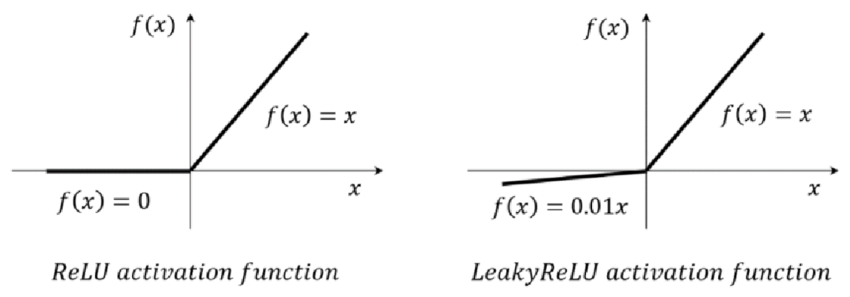

In [ ]:
# input dimension
idim = 300

# hidden dimension
hdim1 = 100

# output dimension
# on a choisit deux neurones
odim = 2

# create an empty model and stack layers one after another
mlp1 = tf.keras.Sequential() # create an empy model
mlp1.add(tf.keras.Input(shape=(idim,),name="input")) # empty dimension for batch size

# LeakyRelu
lRelu = tf.keras.layers.LeakyReLU(
    alpha=0.03
)

mlp1.add(tf.keras.layers.Dense(hdim1, activation=lRelu, name="hidden1"))
mlp1.add(tf.keras.layers.Dropout(0.50)) # drop 50% of the weights

mlp1.add(tf.keras.layers.Dense(odim, activation="softmax", name="output"))
print(f'inputs : {mlp1.inputs}\nlayers : {mlp1.layers}\noutputs : {mlp1.outputs}\noutput shape : {mlp1.output_shape}')

inputs : [<KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'input')>]
layers : [<keras.src.layers.core.dense.Dense object at 0x7fe3d2efdae0>, <keras.src.layers.regularization.dropout.Dropout object at 0x7fe3d2eff280>, <keras.src.layers.core.dense.Dense object at 0x7fe3d2e63700>]
outputs : [<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'output')>]
output shape : (None, 2)


In [ ]:
mlp1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 output (Dense)              (None, 2)                 202       
                                                                 
Total params: 30302 (118.37 KB)
Trainable params: 30302 (118.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


On a 30302 paramètre

Estimation des paramètres

In [ ]:
# ds_estim is the estimation dataset, ds_valid the validation one
training = mlp1.fit(ts_dt_trn, ts_lb_trn, epochs=20, validation_data=(ts_dt_val, ts_lb_val))

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 300), found shape=(32, 1, 300)


In [ ]:
print(training.history.keys())
estim_acc = training.history['accuracy']
valid_acc = training.history['val_accuracy']
estim_loss = training.history['loss']
valid_loss = training.history['val_loss']